In [3]:
import warnings
warnings.simplefilter('ignore')

In [7]:
import pandas as pd
import numpy as np

In [9]:
import seaborn as sns

In [11]:
student_certification=pd.read_excel('student_dataset.xlsx')

In [12]:
student_certification

,S.NO,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT,TOTAL,CERTIFICATE
0,1.0,20.0,38.0,25.0,83,DISTINCTION
1,2.0,15.0,25.0,0.0,40,COMPLETION
2,3.0,20.0,31.0,25.0,76,FIRST CLASS
3,4.0,20.0,25.0,25.0,70,FIRST CLASS
4,5.0,20.0,17.0,15.0,52,FIRST CLASS
...,...,...,...,...,...,...
362,363.0,15.0,0.0,10.0,25,PARTICIPATION
363,364.0,20.0,9.0,25.0,54,COMPLETION
364,365.0,15.0,20.0,25.0,60,FIRST CLASS
365,366.0,15.0,0.0,10.0,25,PARTICIPATION


In [13]:
student_certification = student_certification.drop(['S.NO',"TOTAL"],axis=1)

In [14]:
student_certification

,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT,CERTIFICATE
0,20.0,38.0,25.0,DISTINCTION
1,15.0,25.0,0.0,COMPLETION
2,20.0,31.0,25.0,FIRST CLASS
3,20.0,25.0,25.0,FIRST CLASS
4,20.0,17.0,15.0,FIRST CLASS
...,...,...,...,...
362,15.0,0.0,10.0,PARTICIPATION
363,20.0,9.0,25.0,COMPLETION
364,15.0,20.0,25.0,FIRST CLASS
365,15.0,0.0,10.0,PARTICIPATION


In [15]:
student_certification.shape

(367, 4)

In [16]:
student_certification.head()

,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT,CERTIFICATE
0,20.0,38.0,25.0,DISTINCTION
1,15.0,25.0,0.0,COMPLETION
2,20.0,31.0,25.0,FIRST CLASS
3,20.0,25.0,25.0,FIRST CLASS
4,20.0,17.0,15.0,FIRST CLASS


In [17]:
student_certification['CERTIFICATE'].unique()

array(['DISTINCTION', 'COMPLETION', 'FIRST CLASS', 'PARTICIPATION'],
      dtype=object)

In [18]:
student_certification.groupby('CERTIFICATE').size()

CERTIFICATE
COMPLETION       117
DISTINCTION       32
FIRST CLASS       67
PARTICIPATION    151
dtype: int64

<AxesSubplot:xlabel='CERTIFICATE', ylabel='count'>

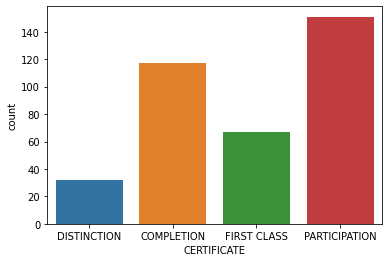

In [19]:
sns.countplot(student_certification['CERTIFICATE'],label="Count")

In [20]:
y=student_certification.iloc[:,-1].values.reshape(-1,1)

In [21]:
y.shape

(367, 1)

In [22]:
y

array([['DISTINCTION'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['PARTICIPATION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['FIRST CLASS'],
       ['PARTICIPATION'],
       ['DISTINCTION'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['PARTICIPATION'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['DISTINCTION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['COMPLETION'],
  

In [23]:
x=student_certification.drop(['CERTIFICATE'],axis=1)

In [24]:
x.shape

(367, 3)

In [25]:
x

,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT
0,20.0,38.0,25.0
1,15.0,25.0,0.0
2,20.0,31.0,25.0
3,20.0,25.0,25.0
4,20.0,17.0,15.0
...,...,...,...
362,15.0,0.0,10.0
363,20.0,9.0,25.0
364,15.0,20.0,25.0
365,15.0,0.0,10.0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)0

In [29]:
x_train.shape

(275, 3)

In [30]:
x_test.shape

(92, 3)

In [31]:
y_train.shape

(275, 1)

In [32]:
y_test.shape

(92, 1)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
DC=DecisionTreeClassifier(criterion='entropy')

In [35]:
DC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [36]:
y_pred = DC.predict(x_test)

In [37]:
y_pred

array(['PARTICIPATION', 'DISTINCTION', 'PARTICIPATION', 'FIRST CLASS',
       'PARTICIPATION', 'PARTICIPATION', 'PARTICIPATION', 'PARTICIPATION',
       'PARTICIPATION', 'COMPLETION', 'PARTICIPATION', 'COMPLETION',
       'PARTICIPATION', 'DISTINCTION', 'COMPLETION', 'DISTINCTION',
       'COMPLETION', 'FIRST CLASS', 'DISTINCTION', 'PARTICIPATION',
       'PARTICIPATION', 'PARTICIPATION', 'DISTINCTION', 'FIRST CLASS',
       'PARTICIPATION', 'PARTICIPATION', 'PARTICIPATION', 'COMPLETION',
       'COMPLETION', 'FIRST CLASS', 'PARTICIPATION', 'FIRST CLASS',
       'PARTICIPATION', 'COMPLETION', 'COMPLETION', 'COMPLETION',
       'FIRST CLASS', 'PARTICIPATION', 'PARTICIPATION', 'COMPLETION',
       'COMPLETION', 'PARTICIPATION', 'PARTICIPATION', 'PARTICIPATION',
       'FIRST CLASS', 'COMPLETION', 'COMPLETION', 'COMPLETION',
       'PARTICIPATION', 'PARTICIPATION', 'PARTICIPATION', 'FIRST CLASS',
       'PARTICIPATION', 'FIRST CLASS', 'PARTICIPATION', 'PARTICIPATION',
       'COMPLETION',

In [38]:
final= pd.DataFrame(y_test, columns=['Actual'])

In [39]:
final['Predicted']=y_pred

In [40]:
final

,Actual,Predicted
0,PARTICIPATION,PARTICIPATION
1,COMPLETION,DISTINCTION
2,COMPLETION,PARTICIPATION
3,FIRST CLASS,FIRST CLASS
4,PARTICIPATION,PARTICIPATION
...,...,...
87,FIRST CLASS,FIRST CLASS
88,PARTICIPATION,PARTICIPATION
89,PARTICIPATION,COMPLETION
90,COMPLETION,COMPLETION


In [41]:
final.groupby('Actual').size()

Actual
COMPLETION       23
DISTINCTION       7
FIRST CLASS      18
PARTICIPATION    44
dtype: int64

In [43]:
final.groupby("Predicted").size()

Predicted
COMPLETION       28
DISTINCTION       7
FIRST CLASS      14
PARTICIPATION    43
dtype: int64

<AxesSubplot:xlabel='Actual', ylabel='count'>

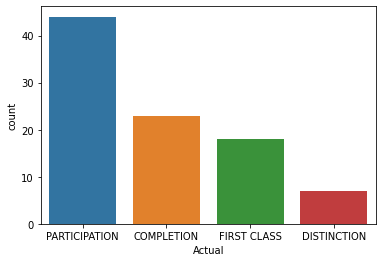

In [45]:
sns.countplot(final['Actual'],label='count')

<AxesSubplot:xlabel='Predicted', ylabel='count'>

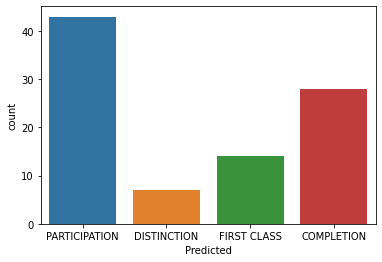

In [46]:
sns.countplot(final['Predicted'],label='count')

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
acc=accuracy_score(y_test, y_pred)

In [49]:
acc

0.6847826086956522

In [50]:
z=confusion_matrix(y_test,y_pred)

In [51]:
z

array([[15,  2,  1,  5],
       [ 0,  2,  5,  0],
       [ 7,  3,  8,  0],
       [ 6,  0,  0, 38]], dtype=int64)

In [52]:
mat = pd.DataFrame(z,columns =['Participation','Completion','First class','Distinction'],index = ['Participation','Completion','First class','Distinction'])

In [53]:
mat

,Participation,Completion,First class,Distinction
Participation,15,2,1,5
Completion,0,2,5,0
First class,7,3,8,0
Distinction,6,0,0,38
